In [1]:
import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [2]:
#reading dataframes

all_data=pd.read_csv("train.csv") 
test_data=pd.read_csv("test.csv")

In [3]:
#all_data.info()

In [4]:
#test_data.info()

In [5]:
#all_data.columns

In [6]:
# X and target y for training data
X_train= all_data.iloc[:,[4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
y_train= all_data.iloc[:, -1]

In [7]:
# X and target y for test data
X_test= test_data.iloc[:,[4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
y_test= test_data.iloc[:, -1]

In [8]:
#Convert y target to 1 for satisfied and 0 for neutral or dissatisfied

y_train = y_train.replace('satisfied',1)
y_train = y_train.replace('neutral or dissatisfied',0)

y_test = y_test.replace('satisfied',1)
y_test = y_test.replace('neutral or dissatisfied',0)

In [9]:
#Train and validation split

X= X_train
y= y_train

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,random_state=42)

In [10]:

#X_train.head()

In [13]:
#Numerical data only

X_train_r = X_train.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
X_val_r = X_val.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
X_test_r = X_test.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]

In [14]:
#X_train_r.head()

In [96]:
#Tuned Random Forest model 


rf = RandomForestClassifier(max_depth=9, random_state=0, n_estimators=100)
rf.fit(X_train_r,y_train)


RandomForestClassifier(max_depth=9, random_state=0)

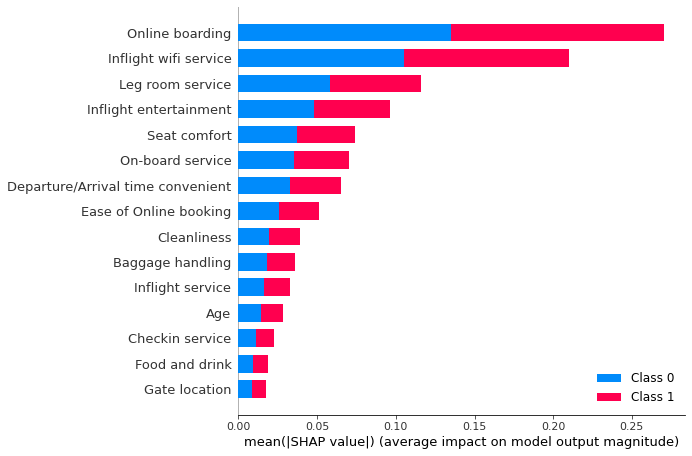

In [65]:
shap_values = shap.TreeExplainer(rf).shap_values(X_train_r)
shap.summary_plot(shap_values, X_train_r, plot_type="bar")

In [16]:
#Tuned Random Forest Classification report on Validation Set 

print(classification_report(y_val, rf.predict(X_val_r)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11713
           1       0.92      0.91      0.92      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781



In [17]:
#Tuned Random Forest Classification report on Test Set 

print(classification_report(y_test, rf.predict(X_test_r)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     14573
           1       0.92      0.90      0.91     11403

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



In [18]:
#ROC score for Tuned Random Forest

roc_auc_score(y_test, rf.predict_proba(X_test_r)[:,1])

0.9778597312887434

In [19]:
#X_val.head()
#X_val.info()

In [23]:
#Age of Twenties Subset of Data 
X_train_20 = X_train_r[(X_train_r.Age > 19) & (X_train_r.Age < 30)]
y_train_20 = y_train[(X_train_r.Age > 19) & (X_train_r.Age < 30)]


X_val_20 = X_val_r[(X_val_r.Age > 19) & (X_val_r.Age < 30)]
y_val_20 = y_val[(X_val_r.Age > 19) & (X_val_r.Age < 30)]

X_test_20 = X_test_r[(X_test_r.Age > 19) & (X_test_r.Age < 30)]
y_test_20 = y_test[(X_test_r.Age > 19) & (X_test_r.Age < 30)]

In [24]:
#X_train_20.info()
#y_train_20
#X_val_20.info()
#y_val_20
#X_test_20.info()
#y_test_20

In [25]:
#Age of Twenties Subset with Tuned Random Forest model

rf_20= RandomForestClassifier(max_depth=9, random_state=0, n_estimators=100)
rf_20.fit(X_train_20,y_train_20)

RandomForestClassifier(max_depth=9, random_state=0)

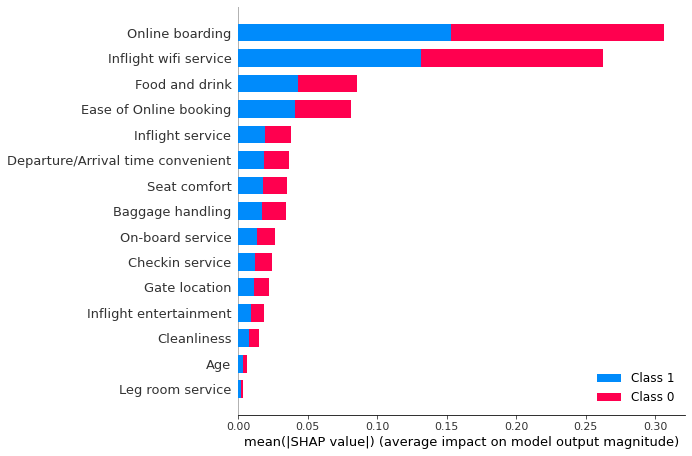

In [46]:
#Age of Twenties Subset  SHAP Values
shap_values = shap.TreeExplainer(rf_20).shap_values(X_train_20)
shap.summary_plot(shap_values, X_train_20, plot_type="bar")

In [26]:
#Age of Twenties Subset - Tuned Random Forest Classification report on Validation Set 

print(classification_report(y_val_20, rf_20.predict(X_val_20)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2675
           1       0.89      0.90      0.90      1468

    accuracy                           0.93      4143
   macro avg       0.92      0.92      0.92      4143
weighted avg       0.93      0.93      0.93      4143



In [27]:
#Age of Twenties Subset - Tuned Random Forest Classification report on Test Set 

print(classification_report(y_test_20, rf_20.predict(X_test_20)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3341
           1       0.90      0.91      0.90      1924

    accuracy                           0.93      5265
   macro avg       0.92      0.93      0.92      5265
weighted avg       0.93      0.93      0.93      5265



In [28]:
#Age of Twenties Subset - ROC score for Tuned Random Forest

roc_auc_score(y_test_20, rf_20.predict_proba(X_test_20)[:,1])

0.9820309597696607

In [30]:
all_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [29]:
#all_data.head()

In [56]:
#Economy Class Subset of Data 
X_train_eco = X_train_r[(X_train.Class == 'Eco')]
y_train_eco = y_train[(X_train.Class == 'Eco')]

X_val_eco = X_val_r[(X_val.Class == 'Eco')]
y_val_eco = y_val[(X_val.Class == 'Eco')]

X_test_eco = X_test_r[(X_test.Class == 'Eco')]
y_test_eco = y_test[(X_test.Class == 'Eco')]

In [57]:
#X_test_eco.info()
#y_test

In [47]:
#Economy Class Subset with Tuned Random Forest model

rf_eco= RandomForestClassifier(max_depth=9, random_state=0, n_estimators=100)
rf_eco.fit(X_train_eco,y_train_eco)

RandomForestClassifier(max_depth=9, random_state=0)

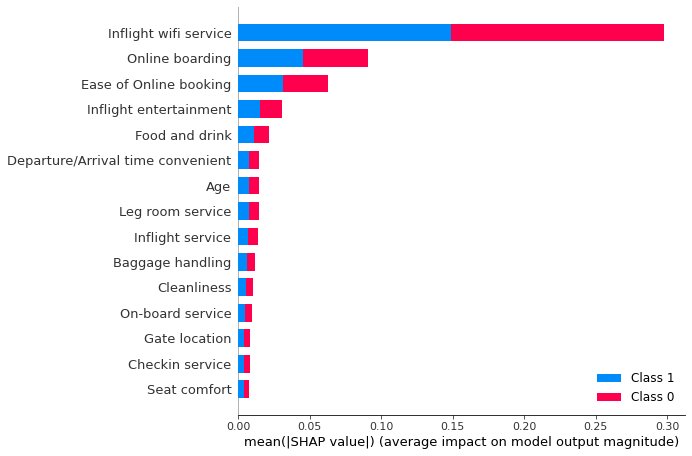

In [64]:
#Economy Class  SHAP Values
shap_values = shap.TreeExplainer(rf_eco).shap_values(X_train_eco)
shap.summary_plot(shap_values, X_train_eco, plot_type="bar")

In [60]:
#Economy Class Subset - Tuned Random Forest Classification report on Validation Set 

print(classification_report(y_val_eco, rf_eco.predict(X_val_eco)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7472
           1       0.91      0.72      0.80      1763

    accuracy                           0.93      9235
   macro avg       0.93      0.85      0.88      9235
weighted avg       0.93      0.93      0.93      9235



In [61]:
#Economy Class Subset - Tuned Random Forest Classification report on Test Set 

print(classification_report(y_test_eco, rf_eco.predict(X_test_eco)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9322
           1       0.91      0.72      0.80      2242

    accuracy                           0.93     11564
   macro avg       0.92      0.85      0.88     11564
weighted avg       0.93      0.93      0.93     11564



In [63]:
#Economy Class Subset - ROC score for Tuned Random Forest

roc_auc_score(y_test_eco, rf_eco.predict_proba(X_test_eco)[:,1])

0.9698364453382702

In [73]:
X_train_r.head()

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
20921,59,4,5,4,1,5,4,5,2,2,4,3,5,2,4
36897,40,4,4,4,2,1,4,5,1,4,2,4,3,5,1
8468,65,2,3,2,1,1,2,1,1,5,4,5,5,5,1
53490,70,3,5,3,4,3,5,4,5,5,3,5,3,5,5
78687,25,2,2,2,3,1,2,1,1,1,2,3,5,2,1


In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83123 entries, 20921 to 15795
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                83123 non-null  int64 
 1   Class                              83123 non-null  object
 2   Inflight wifi service              83123 non-null  int64 
 3   Departure/Arrival time convenient  83123 non-null  int64 
 4   Ease of Online booking             83123 non-null  int64 
 5   Gate location                      83123 non-null  int64 
 6   Food and drink                     83123 non-null  int64 
 7   Online boarding                    83123 non-null  int64 
 8   Seat comfort                       83123 non-null  int64 
 9   Inflight entertainment             83123 non-null  int64 
 10  On-board service                   83123 non-null  int64 
 11  Leg room service                   83123 non-null  int64 
 12  

In [92]:
#Gate location 

#What if gate location was rated five in training data? Would that affect the outcome?

X_train_rg = X_train_r
X_val_rg = X_val_r


In [93]:
#Setting Game location to 5 

X_train_rg['Gate location'] =  X_train_r['Gate location'].replace([1,2,3,4],[5,5,5,5])
X_val_rg['Gate location'] =  X_val_r['Gate location'].replace([1,2,3,4],[5,5,5,5])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [97]:
#What if Gate -Tuned Random Forest model 


rf_g = RandomForestClassifier(max_depth=9, random_state=0, n_estimators=100)
rf_g.fit(X_train_rg,y_train)



RandomForestClassifier(max_depth=9, random_state=0)

In [99]:
#What if Gate - Tuned Random Forest Classification report on Validation Set 

print(classification_report(y_val, rf_g.predict(X_val_rg)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     11713
           1       0.92      0.91      0.91      9068

    accuracy                           0.92     20781
   macro avg       0.92      0.92      0.92     20781
weighted avg       0.92      0.92      0.92     20781



In [102]:
#Tuned Random Forest Classification report on Validation Set 

print(classification_report(y_val, rf.predict(X_val_r)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     11713
           1       0.92      0.91      0.91      9068

    accuracy                           0.92     20781
   macro avg       0.92      0.92      0.92     20781
weighted avg       0.92      0.92      0.92     20781



In [ ]:
#What if Gate location was a 5 in training and validation data
#Conclusion  setting the Gate location to 5 does not change the outcome